In [1]:
#importamos los modulos necesarios
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\alfon\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [45]:
#determinamos el portafolio a analisar para la etapa 2
tickers=["GGAL","BBAR","IRS","TEO","TGS","TS","BMA","EDN","TX","CRESY","PAM"]
data=pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t,data_source="yahoo",start="2013-01-01",end="2017-12-31")["Adj Close"]

In [46]:
data

,GGAL,BBAR,IRS,TEO,TGS,TS,BMA,EDN,TX,CRESY,PAM
Date,,,,,,,,,,,
2013-01-02,6.832772,4.808447,6.463067,8.319373,1.313347,33.925854,16.685476,2.000000,16.857422,8.160698,3.510000
2013-01-03,6.745668,4.780918,6.632210,8.477118,1.365582,33.481972,16.352644,2.000000,16.548243,8.263173,3.580000
2013-01-04,6.677921,4.689154,6.650015,8.504552,1.365582,33.656353,15.976018,2.000000,16.878504,8.328382,3.730000
2013-01-07,6.581140,4.762565,7.112935,8.607432,1.365582,32.681385,16.361404,2.000000,16.653648,8.365647,3.790000
2013-01-08,6.474680,4.689154,7.166348,8.470262,1.387969,32.292980,15.958496,1.990000,16.435812,7.918485,3.740000
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,64.180847,24.421864,29.040001,31.137100,20.355871,28.618811,108.451218,50.540001,26.646383,21.430000,67.430000
2017-12-26,64.171043,24.096750,29.440001,31.104868,19.974739,28.953272,108.303040,49.049999,26.816320,21.299999,67.320000
2017-12-27,64.700409,24.259306,29.389999,30.919813,19.827484,28.627851,107.969658,48.470001,26.629391,21.230000,67.360001


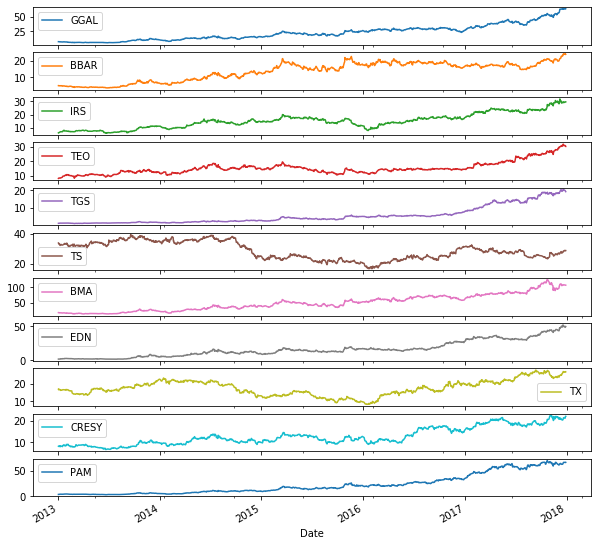

In [85]:
#Vemos como se han comportado en el precio cada una
data.plot(subplots=True,figsize=(10,10))
plt.savefig("C:/Users/alfon/Documents/Etapa3_precios_ind")

In [48]:
#Obtenemos precios Maximos para cada ADR con su Fecha
preciosMax= round (data.max(),2)
fechasMax=data.idxmax()
    

In [52]:
#Armamos la tabla para exponer
tabla=pd.concat([preciosMax,fechasMax],axis=1)
tabla.columns=["Precio Maximo","     Fecha PM"]

print (tabla)

       Precio Maximo      Fecha PM
GGAL           64.78    2017-12-19
BBAR           24.42    2017-12-22
IRS            31.77    2017-12-08
TEO            31.99    2017-12-20
TGS            20.56    2017-12-20
TS             39.74    2013-09-19
BMA           125.44    2017-10-23
EDN            52.00    2017-12-19
TX             27.84    2017-09-13
CRESY          22.56    2017-11-07
PAM            71.11    2017-10-24


In [53]:
#Hacemos lo mismo para precios Minimos
preciosMin= round (data.min(),2)
fechasMin=data.idxmin()
tablaMin=pd.concat([preciosMin,fechasMin],axis=1)
tablaMin.columns=["Precio Minimo","   Fecha PMin"]
    
print (tablaMin)

       Precio Minimo    Fecha PMin
GGAL            4.86    2013-06-25
BBAR            3.36    2013-06-25
IRS             6.23    2013-06-24
TEO             8.32    2013-01-02
TGS             1.16    2013-02-28
TS             16.45    2016-02-02
BMA            12.19    2013-06-24
EDN             1.90    2013-07-18
TX              8.19    2016-01-15
CRESY           6.63    2013-06-21
PAM             2.85    2013-06-21


In [54]:
#Calculamos la suba porcentual de cada ADR en Base al 2013-01-01
data_variaciones=(data/data.iloc[0]-1)*100
data_variaciones

,GGAL,BBAR,IRS,TEO,TGS,TS,BMA,EDN,TX,CRESY,PAM
Date,,,,,,,,,,,
2013-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-01-03,-1.274788,-0.572518,2.617073,1.896121,3.977270,-1.308389,-1.994743,0.000000,-1.834084,1.255716,1.994300
2013-01-04,-2.266291,-2.480909,2.892556,2.225874,3.977270,-0.794382,-4.251951,0.000000,0.125060,2.054782,6.267807
2013-01-07,-3.682718,-0.954201,10.055095,3.462511,3.977270,-3.668202,-1.942239,0.000000,-1.208806,2.511420,7.977207
2013-01-08,-5.240792,-2.480909,10.881543,1.813700,5.681812,-4.813065,-4.356964,-0.500000,-2.501034,-2.968040,6.552707
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,839.309101,407.895047,349.322290,274.272193,1449.923183,-15.643064,549.973760,2427.000046,58.069149,162.600092,1821.082635
2017-12-26,839.165619,401.133751,355.511296,273.884756,1420.903275,-14.657205,549.085693,2352.499962,59.077234,161.007078,1817.948714
2017-12-27,846.913069,404.514379,354.737652,271.660372,1409.691087,-15.616415,547.087658,2323.500061,57.968347,160.149312,1819.088342


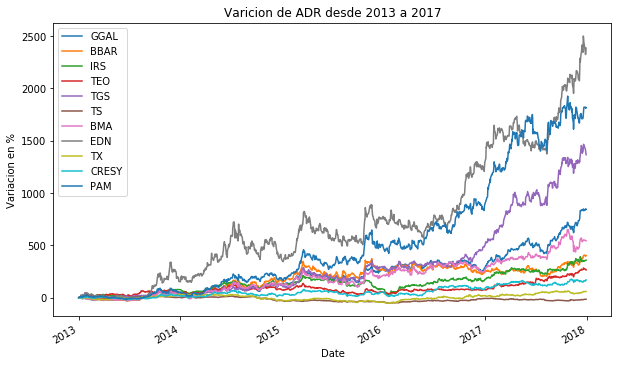

In [84]:
#Graficamos la suba porcentual de lso ADR
data_variaciones.plot(figsize=(10,6))
plt.ylabel("Variacion en %")
plt.title("Varicion de ADR desde 2013 a 2017")
plt.savefig("C:/Users/alfon/Documents/Etapa3_precios_var")


In [56]:
#Vemos el procentaje que subieron los ADR en 5 años(2013-2017)
data_return_total=data.iloc[-1]/data.iloc[0]
data_return_total


GGAL      9.447611
BBAR      5.011338
IRS       4.579869
TEO       3.655725
TGS      14.661614
TS        0.848898
BMA       6.431471
EDN      24.850000
TX        1.592285
CRESY     2.706876
PAM      19.168091
dtype: float64

In [57]:
#Sacamos promedio geometrico anual por año de porcentaje de suba. Se cuentan los 24 meses de 
data_return_a=round(data_return_total**(1/5)-1,2)
data_return_a

GGAL     0.57
BBAR     0.38
IRS      0.36
TEO      0.30
TGS      0.71
TS      -0.03
BMA      0.45
EDN      0.90
TX       0.10
CRESY    0.22
PAM      0.81
dtype: float64

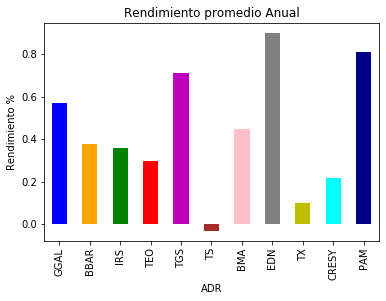

In [83]:
#Graficamos los retornos anuales obtenidos
data_return_a.plot.bar(color=("b","orange","g","r","m","brown","pink","grey","y","cyan","darkblue"))
plt.title("Rendimiento promedio Anual")
plt.ylabel("Rendimiento %")
plt.xlabel("ADR")
plt.savefig("C:/Users/alfon/Documents/Etapa3_rendimientos")

In [61]:
#Para calcular el riesgo, obtenemos los retornos logaritmicos
log_returns=np.log(data/data.shift(1))
log_returns
    

,GGAL,BBAR,IRS,TEO,TGS,TS,BMA,EDN,TX,CRESY,PAM
Date,,,,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.012830,-0.005742,0.025834,0.018784,0.039002,-0.013170,-0.020149,0.000000,-0.018511,0.012479,0.019747
2013-01-04,-0.010094,-0.019380,0.002681,0.003231,0.000000,0.005195,-0.023301,0.000000,0.019761,0.007861,0.041045
2013-01-07,-0.014599,0.015534,0.067296,0.012025,0.000000,-0.029396,0.023836,0.000000,-0.013412,0.004464,0.015958
2013-01-08,-0.016309,-0.015534,0.007481,-0.016065,0.016260,-0.011956,-0.024934,-0.005013,-0.013167,-0.054934,-0.013280
...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,0.009207,0.013799,-0.017409,-0.006963,-0.003399,0.001580,0.002908,-0.004934,-0.012044,0.000467,0.001187
2017-12-26,-0.000153,-0.013402,0.013680,-0.001036,-0.018901,0.011619,-0.001367,-0.029925,0.006357,-0.006085,-0.001633
2017-12-27,0.008215,0.006723,-0.001700,-0.005967,-0.007399,-0.011303,-0.003083,-0.011895,-0.006995,-0.003292,0.000594


In [63]:
#Media logaritmica de retornos
mean=log_returns.mean()*250
mean

GGAL     0.446296
BBAR     0.320291
IRS      0.302399
TEO      0.257610
TGS      0.533631
TS      -0.032555
BMA      0.369873
EDN      0.638485
TX       0.092442
CRESY    0.197893
PAM      0.586893
dtype: float64

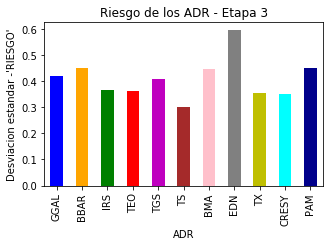

In [86]:
data_stdev=log_returns.std()*250**0.5
data_stdev.plot.bar(color=("b","orange","g","r","m","brown","pink","grey","y","cyan","darkblue"),figsize=(5,3))
plt.xlabel("ADR")
plt.ylabel("Desviacion estandar -'RIESGO'")
plt.title("Riesgo de los ADR - Etapa 3")
plt.savefig("C:/Users/alfon/Documents/Etapa3_riesgos")

In [65]:
data_var=log_returns.var()
data_var

GGAL     0.000699
BBAR     0.000808
IRS      0.000531
TEO      0.000523
TGS      0.000666
TS       0.000362
BMA      0.000799
EDN      0.001416
TX       0.000508
CRESY    0.000492
PAM      0.000817
dtype: float64

In [66]:
cov_matrix=log_returns.cov()*250
cov_matrix

,GGAL,BBAR,IRS,TEO,TGS,TS,BMA,EDN,TX,CRESY,PAM
GGAL,0.174695,0.146363,0.056251,0.077274,0.075708,0.028958,0.145694,0.115107,0.029392,0.056803,0.104589
BBAR,0.146363,0.202081,0.060552,0.082861,0.082382,0.034523,0.153341,0.131172,0.038757,0.057589,0.114907
IRS,0.056251,0.060552,0.132824,0.041766,0.042295,0.023144,0.057269,0.061930,0.027687,0.074278,0.057802
TEO,0.077274,0.082861,0.041766,0.130719,0.054586,0.025952,0.081986,0.071274,0.028111,0.041553,0.067056
TGS,0.075708,0.082382,0.042295,0.054586,0.166596,0.022564,0.080201,0.090649,0.025613,0.045714,0.093547
TS,0.028958,0.034523,0.023144,0.025952,0.022564,0.090420,0.028244,0.032938,0.047974,0.024521,0.027474
BMA,0.145694,0.153341,0.057269,0.081986,0.080201,0.028244,0.199783,0.119522,0.035538,0.059519,0.104652
EDN,0.115107,0.131172,0.061930,0.071274,0.090649,0.032938,0.119522,0.353968,0.028962,0.060987,0.145601
TX,0.029392,0.038757,0.027687,0.028111,0.025613,0.047974,0.035538,0.028962,0.127039,0.028181,0.031753
CRESY,0.056803,0.057589,0.074278,0.041553,0.045714,0.024521,0.059519,0.060987,0.028181,0.122898,0.056304


In [67]:
corr_matrix=log_returns.corr()
corr_matrix

,GGAL,BBAR,IRS,TEO,TGS,TS,BMA,EDN,TX,CRESY,PAM
GGAL,1.000000,0.778982,0.369276,0.511357,0.443782,0.230408,0.779870,0.462894,0.197298,0.387668,0.553730
BBAR,0.778982,1.000000,0.369594,0.509822,0.448990,0.255393,0.763162,0.490451,0.241890,0.365431,0.565631
IRS,0.369276,0.369594,1.000000,0.316966,0.284330,0.211193,0.351560,0.285613,0.213143,0.581367,0.350957
TEO,0.511357,0.509822,0.316966,1.000000,0.369894,0.238713,0.507333,0.331342,0.218139,0.327837,0.410412
TGS,0.443782,0.448990,0.284330,0.369894,1.000000,0.183844,0.439613,0.373291,0.176062,0.319483,0.507164
TS,0.230408,0.255393,0.211193,0.238713,0.183844,1.000000,0.210146,0.184112,0.447612,0.232617,0.202180
BMA,0.779870,0.763162,0.351560,0.507333,0.439613,0.210146,1.000000,0.449456,0.223071,0.379843,0.518107
EDN,0.462894,0.490451,0.285613,0.331342,0.373291,0.184112,0.449456,1.000000,0.136575,0.292405,0.541541
TX,0.197298,0.241890,0.213143,0.218139,0.176062,0.447612,0.223071,0.136575,1.000000,0.225534,0.197133
CRESY,0.387668,0.365431,0.581367,0.327837,0.319483,0.232617,0.379843,0.292405,0.225534,1.000000,0.355403


In [68]:
data_var_a=data_var*250

In [69]:
#Composicion de los portafolio
weigths=np.array([1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11,1/11])

In [76]:
#rendimineto del portafolio
porf_return=round(sum(data_return_a*weigths)*100,2)
print (str(porf_return)+" %")

43.36 %


In [71]:
#VArianza del portafolio
porf_variance=np.dot(weigths.T,np.dot(cov_matrix,weigths))
porf_variance

0.07424779493777119

In [72]:
#Volatilidad del portafolio (Desviacion estandar)
porf_volatility=porf_variance**0.5
porf_volatility

0.27248448568271033

In [73]:
#Desviacion estandar del portafolio
print (str(round(porf_volatility,4)*100)+"%")

27.250000000000004%


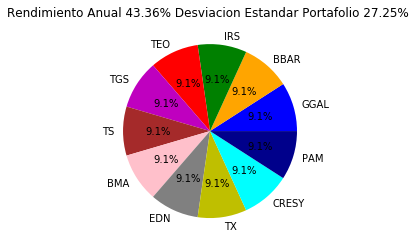

In [87]:
#Grafico del portafolio
plt.pie(weigths,colors=("b","orange","g","r","m","brown","pink","grey","y","cyan","darkblue"),labels=tickers,autopct='%1.1f%%')
plt.title("Rendimiento Anual 43.36% Desviacion Estandar Portafolio 27.25% ")
plt.axis()
plt.savefig("C:/Users/alfon/Documents/Etapa3_porfolio")
